# From Spreadsheets to Scripts: A Practical Demonstration

This notebook demonstrates why and how Python becomes a superior tool to spreadsheets as data analysis tasks increase in scale and complexity. We will walk through three scenarios.

### Setup
First, let's import the necessary libraries and create our sample datasets as CSV files.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO

# -- Create Sample Data --

# Scenario 1: Simple Sales Data
sales_csv = """Date,Region,Product,UnitsSold,Price
2023-10-01,North,Widget A,100,5.00
2023-10-01,South,Widget B,150,7.50
2023-10-02,North,Widget B,80,7.50
2023-10-02,West,Widget A,120,5.00
2023-10-03,South,Widget A,200,5.00
2023-10-03,West,Widget C,50,12.00
"""
with open('data_files/sales.csv', 'w') as f:
    f.write(sales_csv)

# Scenario 2: Messy Transaction Data
transactions_csv = """TransactionID,Timestamp,CustomerID,Amount,Status
1,2023-11-01 09:02,101,150.00,Completed
2,2023-11-01 09:05,102,75.50,completed
3,2023-11-01 09:06,101,,COMPLETED 
4,2023-11-01 09:10,103,25.00,failed
5,2023-11-01 09:12,104,500.00,Completed
6,2023-11-01 09:15,102,15.25,Completed
"""
with open('data_files/transactions.csv', 'w') as f:
    f.write(transactions_csv)

# Scenario 3: Customer Demographics
customers_csv = """CustomerID,AgeGroup,Location
101,25-34,North
102,35-44,West
103,18-24,North
104,45-54,South
"""
with open('data_files/customers.csv', 'w') as f:
    f.write(customers_csv)

print("Sample CSV files created successfully.")

Sample CSV files created successfully.


---

### Scenario 1: Basic Aggregation (The "Pivot Table" Task)

**Task:** Calculate the total revenue per region.

**Excel Approach:** You would manually create a 'Revenue' column by multiplying 'UnitsSold' and 'Price', then create a Pivot Table to sum the new 'Revenue' column, grouping by 'Region'. This is easy for a one-off task.

**Python Approach:** We write a short, repeatable script.

In [7]:
# 1. Load the data
sales_df = pd.read_csv('data_files/sales.csv')

# 2. Create the 'Revenue' column (Vectorized operation)
sales_df['Revenue'] = sales_df['UnitsSold'] * sales_df['Price']

# 3. Group by region and sum the revenue
revenue_by_region = sales_df.groupby('Region')['Revenue'].sum()

print("--- Revenue by Region ---")
print(revenue_by_region)

sales_df.head()

--- Revenue by Region ---
Region
North    1100.0
South    2125.0
West     1200.0
Name: Revenue, dtype: float64


,Date,Region,Product,UnitsSold,Price,Revenue
0,2023-10-01,North,Widget A,100,5.0,500.0
1,2023-10-01,South,Widget B,150,7.5,1125.0
2,2023-10-02,North,Widget B,80,7.5,600.0
3,2023-10-02,West,Widget A,120,5.0,600.0
4,2023-10-03,South,Widget A,200,5.0,1000.0


**Advantage Python:** While simple, these three steps are now a **reproducible recipe**. If you receive an updated `sales.csv` next month, you just re-run this single cell. No manual steps are required.

---

### Scenario 2: Data Cleaning & Automation (Excel Starts to Fail)

**Task:** From the messy transactions data, calculate the total value of all successfully completed transactions.

**Excel Approach:** This becomes tedious. You'd need to:
1. Use `TRIM` and `LOWER` functions in a new column to standardize the 'Status' text.
2. Manually find and delete the row with the missing 'Amount'.
3. Apply a filter to the standardized 'Status' column to show only 'completed'.
4. Use the `SUM` function on the visible 'Amount' cells.
This is prone to error and must be repeated every time you get new data.

In [9]:
# 1. Load the messy data
trans_df = pd.read_csv('data_files/transactions.csv')
print("--- Original Data ---")
print(trans_df)

# 2. Clean the data in a few lines
trans_df.dropna(inplace=True)  # Remove rows with any missing values
trans_df['Status'] = trans_df['Status'].str.lower().str.strip() # Standardize text

print("\n--- Cleaned Data ---")
print(trans_df)

# 3. Filter for completed transactions and calculate total value
completed_transactions = trans_df[trans_df['Status'] == 'completed']
total_value = completed_transactions['Amount'].sum()

print(f"\nTotal value of completed transactions: ${total_value:.2f}")

--- Original Data ---
   TransactionID         Timestamp  CustomerID  Amount      Status
0              1  2023-11-01 09:02         101  150.00   Completed
1              2  2023-11-01 09:05         102   75.50   completed
2              3  2023-11-01 09:06         101     NaN  COMPLETED 
3              4  2023-11-01 09:10         103   25.00      failed
4              5  2023-11-01 09:12         104  500.00   Completed
5              6  2023-11-01 09:15         102   15.25   Completed

--- Cleaned Data ---
   TransactionID         Timestamp  CustomerID  Amount     Status
0              1  2023-11-01 09:02         101  150.00  completed
1              2  2023-11-01 09:05         102   75.50  completed
3              4  2023-11-01 09:10         103   25.00     failed
4              5  2023-11-01 09:12         104  500.00  completed
5              6  2023-11-01 09:15         102   15.25  completed

Total value of completed transactions: $740.75


**Advantage Python:** The entire cleaning and calculation process is automated. This script is not only faster but also more reliable and transparent than a series of manual clicks.

---

### Scenario 3: Merging Data & Advanced Visualization (Impractical in Excel)

**Task:** Combine the cleaned transaction data with customer demographics to find the average transaction amount by location. Then, visualize the distribution of transaction amounts per location.

**Excel Approach:** This is extremely difficult. You would need to use `VLOOKUP` to bring the customer location into the transaction sheet, which is slow on large datasets and can break easily. Then, you'd create a Pivot Table for the average amount. Creating a statistical chart like a box plot to show distribution is not a standard feature.

--- Merged Data ---
   TransactionID         Timestamp  CustomerID  Amount     Status AgeGroup  \
0              1  2023-11-01 09:02         101  150.00  completed    25-34   
1              2  2023-11-01 09:05         102   75.50  completed    35-44   
2              5  2023-11-01 09:12         104  500.00  completed    45-54   
3              6  2023-11-01 09:15         102   15.25  completed    35-44   

  Location  
0    North  
1     West  
2    South  
3     West  

--- Average Transaction Amount by Location ---
Location
North    150.000
South    500.000
West      45.375
Name: Amount, dtype: float64


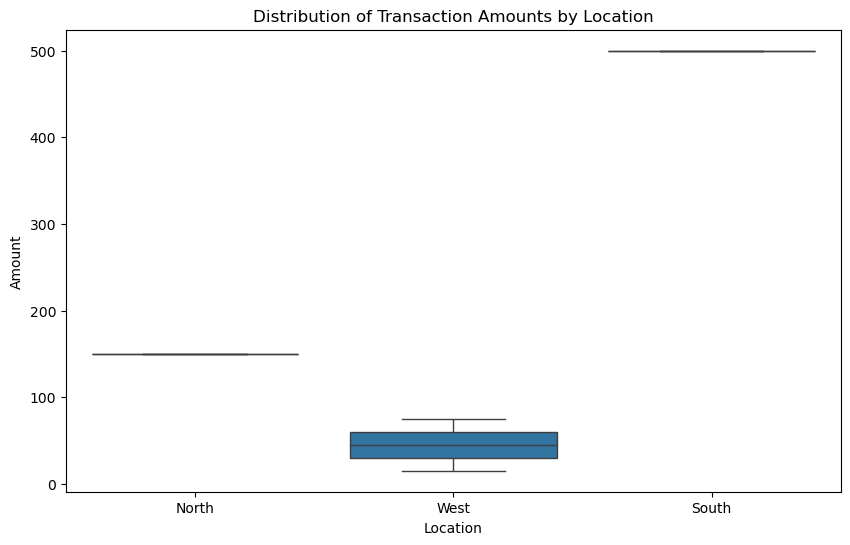

In [10]:
# 1. Load the customer data
cust_df = pd.read_csv('data_files/customers.csv')

# 2. Merge the two dataframes (like a super-powered VLOOKUP)
# We'll use the cleaned 'completed_transactions' from the previous step
merged_df = pd.merge(completed_transactions, cust_df, on='CustomerID')

print("--- Merged Data ---")
print(merged_df)

# 3. Calculate average transaction amount by location
avg_by_location = merged_df.groupby('Location')['Amount'].mean()

print("\n--- Average Transaction Amount by Location ---")
print(avg_by_location)

# 4. Create a sophisticated visualization (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Amount', data=merged_df)
plt.title('Distribution of Transaction Amounts by Location')
plt.show()

**Advantage Python:** This entire workflow—merging disparate data sources, performing multi-level aggregations, and creating advanced statistical visualizations—is where Python and its libraries are untouchable. It's a clear, powerful, and extensible way to derive deep insights from your data that would be out of reach for a spreadsheet user.

In [ ]:
import pandas as pd
import numpy as np
from faker import Faker

# Initialize Faker
fake = Faker()

# Generate sample sales data
np.random.seed(42)
sales_data = {
    "Date": pd.date_range(start="2023-10-01", periods=6, freq="D"),
    "Region": np.random.choice(["North", "South", "West"], size=6),
    "Product": np.random.choice(["Widget A", "Widget B", "Widget C"], size=6),
    "UnitsSold": np.random.randint(50, 200, size=6),
    "Price": np.random.choice([5.00, 7.50, 12.00], size=6),
}
sales_df = pd.DataFrame(sales_data)
sales_df["Revenue"] = sales_df["UnitsSold"] * sales_df["Price"]

# Generate sample transaction data
transaction_data = {
    "TransactionID": range(1, 7),
    "Timestamp": [fake.date_time_this_month() for _ in range(6)],
    "CustomerID": np.random.randint(101, 105, size=6),
    "Amount": np.random.choice([15.25, 25.00, 75.50, 150.00, 500.00], size=6),
    "Status": np.random.choice(["Completed", "completed", "failed", "COMPLETED "], size=6),
}
trans_df = pd.DataFrame(transaction_data)

# Generate sample customer data
customer_data = {
    "CustomerID": range(101, 105),
    "AgeGroup": np.random.choice(["18-24", "25-34", "35-44", "45-54"], size=4),
    "Location": np.random.choice(["North", "South", "West"], size=4),
}
cust_df = pd.DataFrame(customer_data)

# Save to CSV files (optional)
sales_df.to_csv("data_files/sales.csv", index=False)
trans_df.to_csv("data_files/transactions.csv", index=False)
cust_df.to_csv("data_files/customers.csv", index=False)

print("Sample data generated successfully.")